### age in years
### sex:- 1-male,0-female
### chest pain type (4 values) - cp
### resting blood pressure - trestbps
### serum cholestoral in mg/dl - chol
### fasting blood sugar > 120 mg/dl - fbs 1-true, 0-false
### resting electrocardiographic results (values 0,1,2) - restecg
### maximum heart rate achieved - thalach
### exercise induced angina - exang (1 = yes; 0 = no)
### oldpeak = ST depression induced by exercise relative to rest - oldpeak
### the slope of the peak exercise ST segment - slope
### number of major vessels (0-3) colored by flourosopy - ca
### thal: 0 = normal; 1 = fixed defect; 2 = reversable defect - thal 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Users\omkar\OneDrive\Desktop\PythonProjects\Machine Learning Projects\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.shape

(1025, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='sex', ylabel='count'>

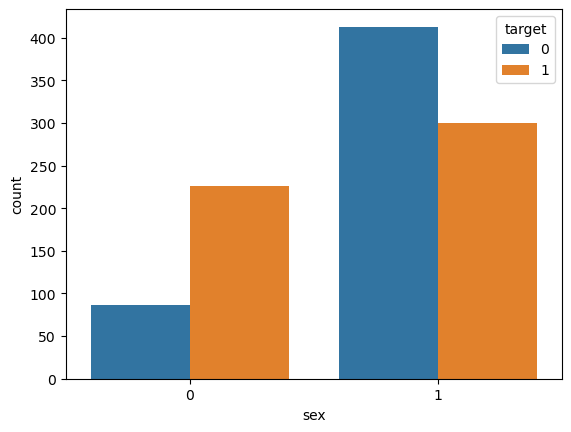

In [6]:
sns.countplot(x='sex',data=df,hue='target')

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

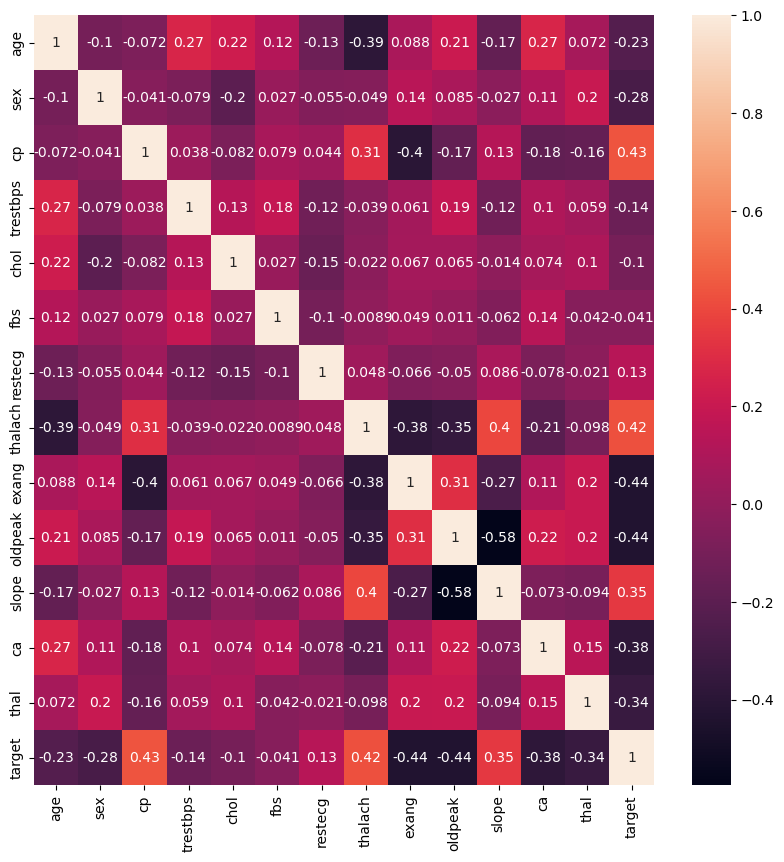

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)

<Axes: >

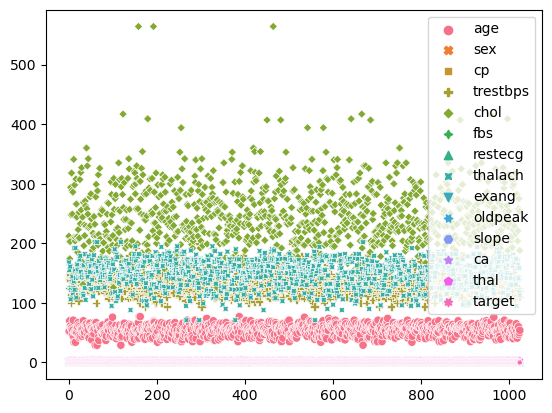

In [9]:
sns.scatterplot(data=df)

In [10]:
def outlier_handle(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_limit = Q1-1.5*IQR
        upper_limit = Q3+1.5*IQR
        new_df = df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]
    return new_df

In [11]:
df_cleaned = outlier_handle(df,['trestbps','chol'])

In [12]:
X=df_cleaned.drop('target',axis='columns')
Y=df_cleaned.target

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [14]:
# rfc = RandomForestClassifier()
# rfc.fit(X_train,Y_train)
# ytrainpre=rfc.predict(X_train)
# ytestpre=rfc.predict(X_test)
# print("Train Prediction",accuracy_score(Y_train,ytrainpre))
# print("Test Prediction",accuracy_score(Y_test,ytestpre))

In [15]:
rfc = RandomForestClassifier()
param_dic={"max_depth":[6,7,8],"criterion":["gini","entropy"],"n_estimators":[1000]}
grid=GridSearchCV(rfc,param_grid=param_dic,cv=5,n_jobs=-1)
grid.fit(X_train,Y_train)
print(grid.best_estimator_)
print(grid.best_params_)
ytrainpre=grid.predict(X_train)
ytestpre=grid.predict(X_test)
print("Train Prediction",accuracy_score(Y_train,ytrainpre))
print("Test Prediction",accuracy_score(Y_test,ytestpre))

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1000)
{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 1000}
Train Prediction 1.0
Test Prediction 1.0


In [16]:
# dtc = DecisionTreeClassifier()
# param_dic={"max_depth":[6,7,8],"criterion":["gini","entropy"]}
# grid=GridSearchCV(dtc,param_grid=param_dic,cv=5,n_jobs=-1)
# grid.fit(X_train,Y_train)
# print(grid.best_estimator_)
# print(grid.best_params_)
# ytrainpre=grid.predict(X_train)
# ytestpre=grid.predict(X_test)
# print("Train Prediction",accuracy_score(Y_train,ytrainpre))
# print("Test Prediction",accuracy_score(Y_test,ytestpre))

In [17]:
# lr=LogisticRegression()
# lr.fit(X_train,Y_train)
# ytrainpre=lr.predict(X_train)
# ytestpre=lr.predict(X_test)
# print("Train Prediction",accuracy_score(Y_train,ytrainpre))
# print("Test Prediction",accuracy_score(Y_test,ytestpre))

In [18]:
df['slope'].min()

0

<Axes: xlabel='trestbps', ylabel='Count'>

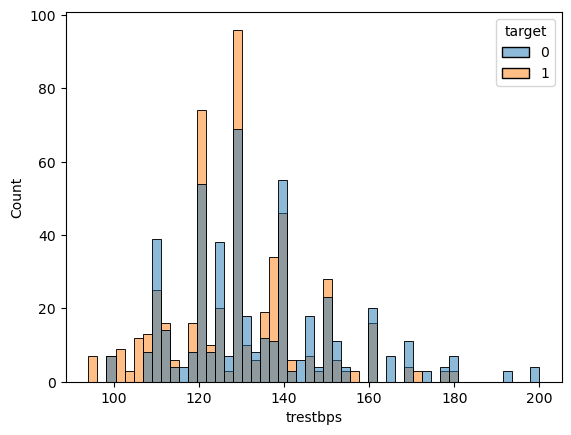

In [19]:
sns.histplot(x='trestbps',hue='target',data=df_cleaned,bins=50)

<Axes: xlabel='chol', ylabel='Count'>

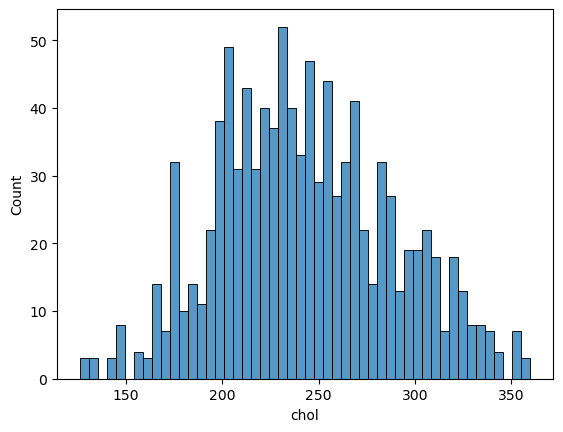

In [20]:
sns.histplot(x='chol',data=df_cleaned,bins=50)

C:\Users\omkar\AppData\Local\Temp\ipykernel_9880\3602064120.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


<Axes: >

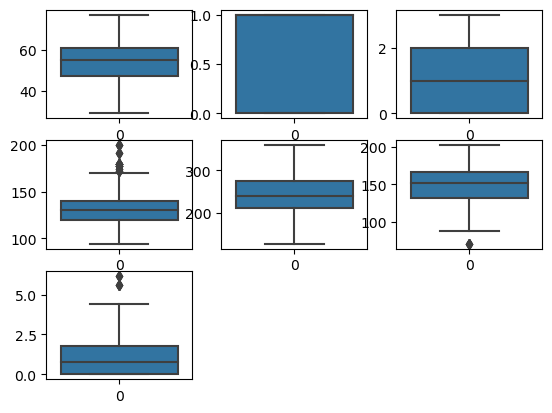

In [21]:
plt.title("Age")
plt.subplot(3,3,1)
sns.boxplot(df_cleaned["age"])
plt.subplot(3,3,2)
sns.boxplot(df_cleaned["sex"])
plt.subplot(3,3,3)
sns.boxplot(df_cleaned['cp'])
plt.subplot(3,3,4)
sns.boxplot(df_cleaned['trestbps'])
plt.subplot(3,3,5)
sns.boxplot(df_cleaned["chol"])
plt.subplot(3,3,6)
sns.boxplot(df_cleaned["thalach"])
plt.subplot(3,3,7)
sns.boxplot(df_cleaned['oldpeak'])

In [22]:
import pickle
best_model = grid.best_estimator_
with open("new_model.pkl","wb") as f:
    pickle.dump(best_model,f)
print("Model trained as saved")

Model trained as saved


In [23]:
print(type(rfc))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [24]:
import sklearn
print(sklearn.__version__)


1.6.0


In [25]:
# pip install scikit-learn==1.6.0

In [26]:
sklearn.__version__

'1.6.0'

In [27]:
import sklearn
print(sklearn.__version__)


1.6.0


In [28]:
# !conda install scikit-learn=1.6.0 -y


In [29]:
import sklearn
print(sklearn.__version__)

1.6.0
